## KMeans Market Segmentation Example

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

sns.set()

In [2]:
raw_data = pd.read_csv('../../resources/udemy/clustering/3.12.+Example.csv')
raw_data.head()

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


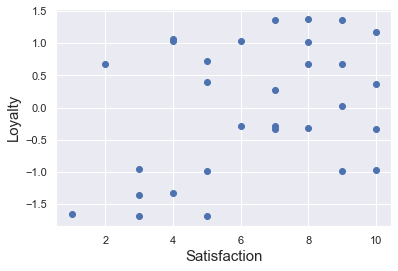

In [3]:
plt.scatter(raw_data['Satisfaction'], raw_data['Loyalty'])
plt.xlabel('Satisfaction', fontsize=15)
plt.ylabel('Loyalty', fontsize=15)
plt.show()

In [4]:
x = raw_data.copy()

In [5]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(n_clusters=2)

In [6]:
clusters = x.copy()
clusters['cluster_pred'] = kmeans.fit_predict(x)
clusters.head()

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,0
1,6,-0.28,0
2,5,-0.99,0
3,7,-0.29,1
4,4,1.06,0


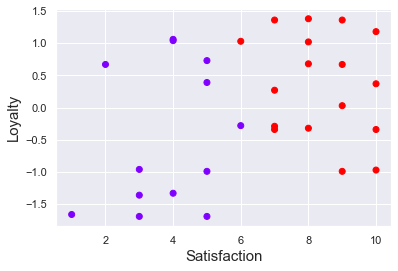

In [7]:
plt.scatter(clusters['Satisfaction'], clusters['Loyalty'], c=clusters['cluster_pred'], cmap='rainbow')
plt.xlabel('Satisfaction', fontsize=15)
plt.ylabel('Loyalty', fontsize=15)
plt.show()

#### Standardize the variables

In [8]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

#### WCSS (Elbow Method)

In [9]:
wcss = []
for i in range(1 , 10):
    km = KMeans(i)
    km.fit(x_scaled)
    wcss.append(km.inertia_)

wcss

[59.99999999999999,
 29.818973034723143,
 17.913349527387968,
 10.247181805928422,
 7.792695153937188,
 6.549836791599329,
 5.5111547784415835,
 4.39399794156044,
 3.8387030819038697]

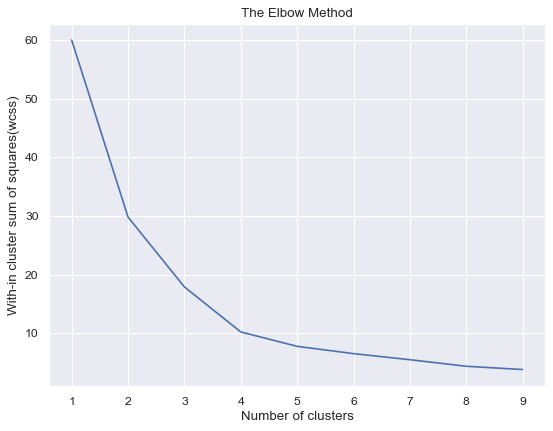

In [10]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('With-in cluster sum of squares(wcss)')
plt.show()

#### Selecting the number of clusters

In [11]:
km_new = KMeans(4)
km_new.fit(x_scaled)
cluster_new = x.copy()
cluster_new['cluster_pred'] = km_new.fit_predict(x_scaled)
cluster_new.head()

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,0
1,6,-0.28,2
2,5,-0.99,0
3,7,-0.29,2
4,4,1.06,3


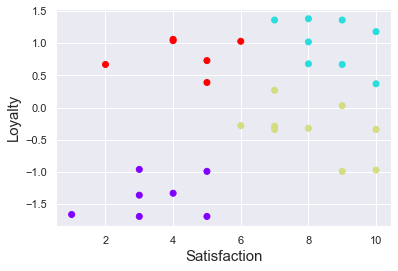

In [12]:
plt.scatter(cluster_new['Satisfaction'], cluster_new['Loyalty'], c=cluster_new['cluster_pred'], cmap='rainbow')
plt.xlabel('Satisfaction', fontsize=15)
plt.ylabel('Loyalty', fontsize=15)
plt.show()